In [10]:
from tensorflow.keras.metrics import AUC
from tensorflow.keras.utils import image_dataset_from_directory
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
from tensorflow.keras.layers.experimental.preprocessing import Rescaling
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [20]:
train_dir = "../data/chest_xray/new_train"
test_dir = "../data/chest_xray/new_test"
val_dir = "../data/chest_xray/new_val"
batch_size = 64
image_size=(64,64)

train_ds = image_dataset_from_directory(train_dir,
                                        label_mode='binary',
                                        batch_size=batch_size,
                                        image_size=image_size,
                                        color_mode="grayscale")

test_ds = image_dataset_from_directory(test_dir,
                                        label_mode='binary',
                                        batch_size=batch_size,
                                        image_size=image_size,
                                        color_mode="grayscale")

val_ds = image_dataset_from_directory(val_dir,
                                        label_mode='binary',
                                        batch_size=batch_size,
                                        image_size=image_size,
                                        color_mode="grayscale")



Found 4684 files belonging to 2 classes.
Found 587 files belonging to 2 classes.
Found 585 files belonging to 2 classes.


In [24]:
input_shape = image_size + (1,)

# Define the model
baseline_model = Sequential([
    # Rescaling layer to normalize pixel values
    # Rescaling(1./255, input_shape=input_shape),
    
    # Flatten the input images to a vector
    # Flatten(),
    
    # Add dense layers
    Dense(50, activation='relu', input_shape=input_shape)),  # First hidden layer
    Dense(25, activation='relu'),   # Second hidden layer
    
    # Output layer with sigmoid activation for binary classification
    Dense(1, activation='sigmoid')
])

# Compile the model
baseline_model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=[AUC(curve='PR', name='auc_pr')])

# Model summary
baseline_model.summary()

SyntaxError: closing parenthesis ')' does not match opening parenthesis '[' on line 4 (3318057572.py, line 12)

In [12]:
input_shape = image_size + (1,)

# Define the model
baseline_model = Sequential([
    # Rescaling layer to normalize pixel values
    Rescaling(1./255, input_shape=input_shape),
    
    # Flatten the input images to a vector
    Flatten(),
    
    # Add dense layers
    Dense(128, activation='relu'),  # First hidden layer
    Dense(64, activation='relu'),   # Second hidden layer
    
    # Output layer with sigmoid activation for binary classification
    Dense(1, activation='sigmoid')
])

# Compile the model
baseline_model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=[AUC(curve='PR', name='auc_pr')])

# Model summary
baseline_model.summary()


Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 rescaling_3 (Rescaling)     (None, 128, 128, 1)       0         
                                                                 
 flatten_3 (Flatten)         (None, 16384)             0         
                                                                 
 dense_9 (Dense)             (None, 128)               2097280   
                                                                 
 dense_10 (Dense)            (None, 64)                8256      
                                                                 
 dense_11 (Dense)            (None, 1)                 65        
                                                                 
Total params: 2105601 (8.03 MB)
Trainable params: 2105601 (8.03 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [3]:
## NOT BASELINE
input_shape = image_size + (1,)
baseline_model = Sequential([
    # Rescaling layer to normalize pixel values
    Rescaling(1./255, input_shape=input_shape),
    
    # Convolutional layer 1
    Conv2D(32, (3, 3), activation='relu'),
    MaxPooling2D(2, 2),
    
    # Flattening the 3D outputs to 1D
    Flatten(),
    
    # Fully connected layer and output
    Dense(64, activation='relu'),
    Dense(1, activation='sigmoid')  # Use sigmoid for binary classification
])

baseline_model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

baseline_model.summary()


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 rescaling (Rescaling)       (None, 128, 128, 1)       0         
                                                                 
 conv2d (Conv2D)             (None, 126, 126, 32)      320       
                                                                 
 max_pooling2d (MaxPooling2  (None, 63, 63, 32)        0         
 D)                                                              
                                                                 
 flatten (Flatten)           (None, 127008)            0         
                                                                 
 dense (Dense)               (None, 64)                8128576   
                                                                 
 dense_1 (Dense)             (None, 1)                 65        
                                                        

In [25]:
baseline_history = baseline_model.fit(train_ds,
                                      epochs=20,
                                      validation_data=val_ds)

Epoch 1/20
74/74 [==============================] - 10s 117ms/step - loss: 0.1326 - auc_pr: 0.9937 - val_loss: 0.2164 - val_auc_pr: 0.9877
Epoch 2/20
74/74 [==============================] - 11s 133ms/step - loss: 0.1625 - auc_pr: 0.9910 - val_loss: 0.1979 - val_auc_pr: 0.9921
Epoch 3/20
74/74 [==============================] - 9s 115ms/step - loss: 0.1396 - auc_pr: 0.9931 - val_loss: 0.1603 - val_auc_pr: 0.9919
Epoch 4/20
74/74 [==============================] - 9s 115ms/step - loss: 0.1416 - auc_pr: 0.9932 - val_loss: 0.1682 - val_auc_pr: 0.9920
Epoch 5/20
74/74 [==============================] - 9s 112ms/step - loss: 0.1246 - auc_pr: 0.9948 - val_loss: 0.1543 - val_auc_pr: 0.9920
Epoch 6/20
74/74 [==============================] - 9s 113ms/step - loss: 0.1225 - auc_pr: 0.9943 - val_loss: 0.2349 - val_auc_pr: 0.9860
Epoch 7/20
74/74 [==============================] - 10s 125ms/step - loss: 0.1350 - auc_pr: 0.9936 - val_loss: 0.1615 - val_auc_pr: 0.9896
Epoch 8/20
74/74 [=============

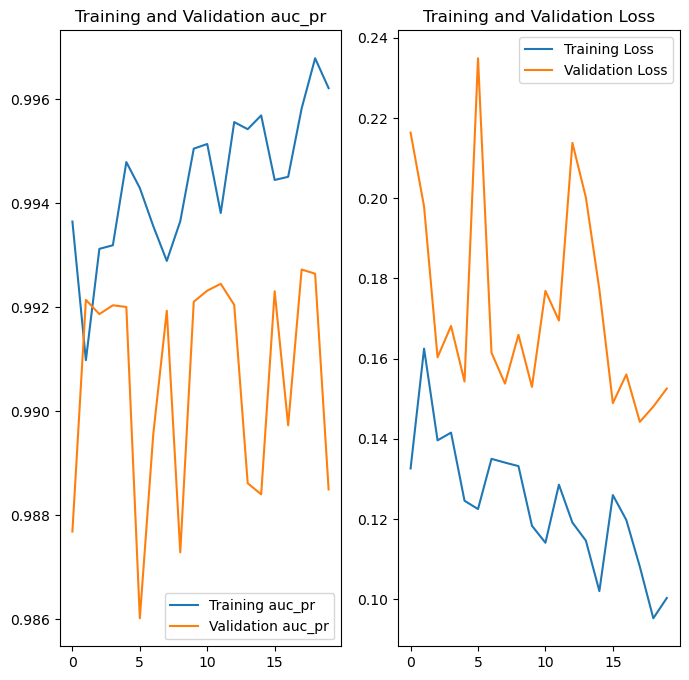

In [26]:
def visualize_training_results(history):
    auc_pr = history.history['auc_pr']
    val_auc_pr = history.history['val_auc_pr']
    
    loss = history.history['loss']
    val_loss = history.history['val_loss']
    
    epochs_range = range(20)
    
    plt.figure(figsize=(8, 8))
    plt.subplot(1, 2, 1)
    plt.plot(epochs_range, auc_pr, label='Training auc_pr')
    plt.plot(epochs_range, val_auc_pr, label='Validation auc_pr')
    plt.legend(loc='lower right')
    plt.title('Training and Validation auc_pr')
    
    plt.subplot(1, 2, 2)
    plt.plot(epochs_range, loss, label='Training Loss')
    plt.plot(epochs_range, val_loss, label='Validation Loss')
    plt.legend(loc='upper right')
    plt.title('Training and Validation Loss')
    plt.show()
visualize_training_results(baseline_history)

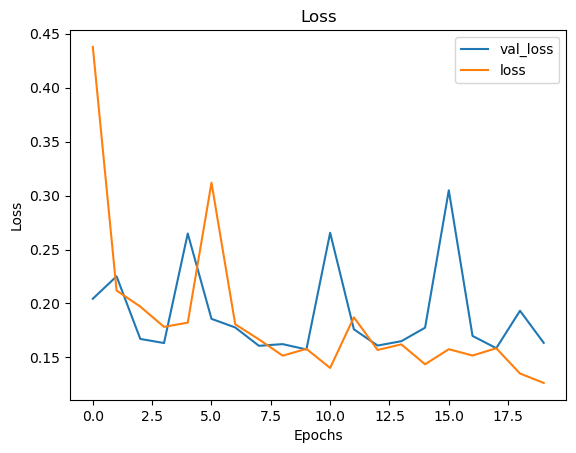

KeyError: 'val_accuracy'

<Figure size 640x480 with 0 Axes>

In [19]:
def visualize_training_results2(results):
    history = results.history
    plt.figure()
    plt.plot(history['val_loss'])
    plt.plot(history['loss'])
    plt.legend(['val_loss', 'loss'])
    plt.title('Loss')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.show()
    
    plt.figure()
    plt.plot(history['val_accuracy'])
    plt.plot(history['accuracy'])
    plt.legend(['val_acc', 'acc'])
    plt.title('Accuracy')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.show()
visualize_training_results2(baseline_history)

In [ ]:
tf.keras.initializers.HeNormal 
tf.keras.initializers.LecunNormal 
tf.keras.optimizers.experimental.RMSprop 
model.compile(loss='binary_crossentropy',
              optimizer=optimizers.RMSprop(learning_rate=1e-4),
              metrics=['acc'])
tf.keras.optimizers.Adam 

early_stopping = [EarlyStopping(monitor='val_loss', patience=10), 
L2_model.add(layers.Dense(50, activation='relu', kernel_regularizer=regularizers.l2(0.005), input_shape=(2000,)))
L1_model.add(layers.Dense(50, activation='relu', kernel_regularizer=regularizers.l1(0.005), input_shape=(2000,)))

                  

In [ ]:
model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu',
                        input_shape=(64 ,64,  3)))
model.add(layers.MaxPooling2D((2, 2)))

model.add(layers.Conv2D(32, (4, 4), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))

model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))

model.add(layers.Flatten())
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

model.compile(loss='binary_crossentropy',
              optimizer="sgd",
              metrics=['acc'])

In [ ]:
random.seed(123)
dropout_model = models.Sequential()

# Implement dropout to the input layer
# NOTE: This is where you define the number of units in the input layer
dropout_model.add(layers.Dropout(0.3, input_shape=(2000,)))

# Add the first hidden layer
dropout_model.add(layers.Dense(50, activation='relu'))

# Implement dropout to the first hidden layer 
dropout_model.add(layers.Dropout(0.3))

# Add the second hidden layer
dropout_model.add(layers.Dense(25, activation='relu'))

# Implement dropout to the second hidden layer 
dropout_model.add(layers.Dropout(0.3))

# Add the output layer
dropout_model.add(layers.Dense(7, activation='softmax'))


# Compile the model
dropout_model.compile(optimizer='SGD', 
                      loss='categorical_crossentropy', 
                      metrics=['acc'])

# Train the model
dropout_model_val = dropout_model.fit(X_train_tokens, 
                                      y_train_lb, 
                                      epochs=150, 
                                      batch_size=256, 
                                      validation_data=(X_val_tokens, y_val_lb))